In [4]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

In [5]:
conn = msql.connect(
host="localhost", user="root",database='superstore', password="9812762827")
df_customer = pd.read_sql_query("SELECT * FROM customer",conn)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\1365752817.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer = pd.read_sql_query("SELECT * FROM customer",conn)


In [6]:
df_customer

,Customer ID,Customer Name,Segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AA-315,Alex Avila,Consumer
...,...,...,...
1584,YS-21880,Yana Sorensen,Corporate
1585,ZC-11910,Zuschuss Carroll,Consumer
1586,ZC-21910,Zuschuss Carroll,Consumer
1587,ZD-11925,Zuschuss Donatelli,Consumer


In [7]:
df_product = pd.read_sql_query("SELECT * FROM product",conn)
df_product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\3984208670.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product = pd.read_sql_query("SELECT * FROM product",conn)


,Product ID,Product Name,Category,Sub-Category
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings
1,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings
2,FUR-ADV-10000183,"Advantus Photo Frame, Black",Furniture,Furnishings
3,FUR-ADV-10000188,"Advantus Stacking Tray, Erganomic",Furniture,Furnishings
4,FUR-ADV-10000190,"Advantus Frame, Duo Pack",Furniture,Furnishings
...,...,...,...,...
10241,TEC-STA-10004181,"StarTech Inkjet, Durable",Technology,Machines
10242,TEC-STA-10004536,"StarTech Inkjet, Wireless",Technology,Machines
10243,TEC-STA-10004542,"StarTech Calculator, Durable",Technology,Machines
10244,TEC-STA-10004834,"StarTech Receipt Printer, Red",Technology,Machines


In [8]:
df_order_detail = pd.read_sql_query("SELECT * FROM order_detail",conn)
df_order_detail

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\3478954931.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_detail = pd.read_sql_query("SELECT * FROM order_detail",conn)


,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787
...,...,...,...,...,...,...,...,...
49665,51286,HU-2012-7730,OFF-AVE-10004570,11.07,1,0.0,3.42,1.980
49666,51287,HU-2012-7730,TEC-LOG-10004419,61.44,2,0.0,18.42,13.020
49667,51288,HU-2012-7730,OFF-BOS-10002705,80.52,4,0.0,20.88,8.780
49668,51289,HU-2012-7730,OFF-ENE-10004132,130.44,4,0.0,33.84,18.970


In [9]:
dis=df_order_detail[df_order_detail['Discount']>0]
dis

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
16,17,US-2013-126655,OFF-EN-10000761,18.840,2,0.4,-6.600,1.602
17,18,US-2013-126655,FUR-FU-10003066,308.280,7,0.4,-149.100,27.770
18,19,US-2013-126655,OFF-EN-10000075,40.176,2,0.4,-6.064,2.137
19,20,US-2013-126655,OFF-EN-10002226,8.784,3,0.4,-4.836,0.380
20,21,MX-2013-167759,FUR-CH-10002132,273.472,4,0.2,95.712,48.165
...,...,...,...,...,...,...,...,...
49655,51276,TU-2013-7900,TEC-BEL-10001971,16.860,1,0.6,-11.400,6.490
49656,51277,TU-2013-7800,OFF-ELI-10001812,19.452,1,0.6,-26.268,0.490
49657,51278,TU-2013-7800,OFF-ADV-10004598,5.352,1,0.6,-4.818,0.250
49658,51279,TU-2013-7800,OFF-ADV-10000331,5.580,1,0.6,-1.980,0.410


In [10]:
df_order_returned = pd.read_sql_query("SELECT * FROM returned",conn)
df_order_returned

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\2055980486.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_returned = pd.read_sql_query("SELECT * FROM returned",conn)


,Order ID
0,CA-2011-100762
1,CA-2011-100867
2,CA-2011-102652
3,CA-2011-103373
4,CA-2011-103744
...,...
1167,US-2014-160745
1168,US-2014-161830
1169,US-2014-167178
1170,US-2014-167500


In [11]:
df_shipping = pd.read_sql_query("SELECT * FROM shipping",conn)
df_shipping

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\518335040.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shipping = pd.read_sql_query("SELECT * FROM shipping",conn)


,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region
0,21043,CA-2012-124891,2012-07-31,Same Day,New York City,New York,United States,East
1,21044,IN-2013-77878,2013-02-07,Second Class,Wollongong,New South Wales,Australia,Oceania
2,21045,IN-2013-71249,2013-10-18,First Class,Brisbane,Queensland,Australia,Oceania
3,21046,ES-2013-1579342,2013-01-30,First Class,Berlin,Berlin,Germany,Central
4,21047,SG-2013-4320,2013-11-06,Same Day,Dakar,Dakar,Senegal,Africa
...,...,...,...,...,...,...,...,...
25028,46071,ZI-2011-4350,2011-03-26,Standard Class,Harare,Harare,Zimbabwe,Africa
25029,46072,MX-2014-169530,2014-06-11,First Class,Bragança Paulista,São Paulo,Brazil,South
25030,46073,IN-2014-72327,2014-05-30,Same Day,Lucknow,Uttar Pradesh,India,Central Asia
25031,46074,IN-2014-57662,2014-08-10,Standard Class,Townsville,Queensland,Australia,Oceania


In [12]:
df_order = pd.read_sql_query("SELECT * FROM `order`",conn)
df_order

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\2602445205.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql_query("SELECT * FROM `order`",conn)


,Order ID,Customer ID,Order Priority,Order Date,Market
0,AE-2011-9160,PO-8865,Medium,2011-10-03,EMEA
1,AE-2013-1130,EB-4110,High,2013-10-14,EMEA
2,AE-2013-1530,MY-7380,High,2013-12-31,EMEA
3,AE-2014-2840,PG-8820,Critical,2014-11-05,EMEA
4,AE-2014-3830,GH-4665,Medium,2014-12-13,EMEA
...,...,...,...,...,...
25028,ZI-2014-7160,EH-4125,Medium,2014-10-30,Africa
25029,ZI-2014-7610,BS-1380,Medium,2014-03-24,Africa
25030,ZI-2014-9540,BT-1395,Medium,2014-06-09,Africa
25031,ZI-2014-9550,JC-5775,Medium,2014-12-18,Africa


In [13]:
merge_df=pd.merge(df_order_detail,df_product)
merge_df=merge_df.drop(columns=['Quantity','Shipping Cost','Product Name','Category','Row ID'])
merge_df

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category
0,MX-2014-143658,OFF-LA-10002782,13.080,0.0,4.560,Labels
1,MX-2014-137575,OFF-LA-10002782,30.520,0.0,10.640,Labels
2,US-2011-115392,OFF-LA-10002782,7.848,0.4,-0.672,Labels
3,MX-2013-122910,OFF-LA-10002782,4.360,0.0,1.520,Labels
4,MX-2012-112291,OFF-LA-10002782,8.720,0.0,3.040,Labels
...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,0.0,58.020,Bookcases
49666,BO-2014-9040,OFF-KRA-10002441,18.840,0.0,9.210,Envelopes
49667,SF-2012-5260,OFF-GRE-10003213,16.950,0.0,1.860,Paper
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables


In [14]:
product_count=merge_df['Product ID'].value_counts()
merge_df['order Count']=merge_df['Product ID'].map(product_count)
merge_df[2340:2348]

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count
2340,US-2014-127579,TEC-AC-10001246,70.596,0.4,-22.404,Accessories,7
2341,US-2014-118794,TEC-AC-10001246,94.128,0.4,-29.872,Accessories,7
2342,MX-2013-147802,TEC-AC-10001246,78.440,0.0,16.440,Accessories,7
2343,MX-2014-131149,TEC-PH-10001917,262.140,0.0,5.220,Phones,13
2344,MX-2012-169894,TEC-PH-10001917,524.280,0.0,10.440,Phones,13
2345,MX-2014-114797,TEC-PH-10001917,262.140,0.0,5.220,Phones,13
2346,MX-2013-150721,TEC-PH-10001917,524.280,0.0,10.440,Phones,13
2347,MX-2014-117240,TEC-PH-10001917,262.140,0.0,5.220,Phones,13


In [15]:
non_repet_df=merge_df.drop_duplicates(subset=['Product ID'])
non_repet_df

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count
0,MX-2014-143658,OFF-LA-10002782,13.080,0.0,4.560,Labels,5
5,MX-2012-155047,FUR-FU-10004015,252.160,0.0,90.720,Furnishings,9
14,MX-2012-155047,FUR-BO-10002352,193.280,0.0,54.080,Bookcases,7
21,MX-2012-155047,OFF-BI-10004428,35.440,0.0,4.960,Binders,7
28,MX-2012-155047,OFF-AR-10004594,71.600,0.0,11.440,Art,4
...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,0.0,58.020,Bookcases,1
49666,BO-2014-9040,OFF-KRA-10002441,18.840,0.0,9.210,Envelopes,1
49667,SF-2012-5260,OFF-GRE-10003213,16.950,0.0,1.860,Paper,1
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1


In [16]:
neg_profit=(non_repet_df['Profit']<0).sum()
neg_profit

2771

In [17]:
dis=non_repet_df[non_repet_df['Discount']>0]
dis

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count
95,US-2013-126655,OFF-EN-10000761,18.840,0.4,-6.600,Envelopes,7
102,US-2013-126655,FUR-FU-10003066,308.280,0.4,-149.100,Furnishings,3
105,US-2013-126655,OFF-EN-10000075,40.176,0.4,-6.064,Envelopes,8
113,US-2013-126655,OFF-EN-10002226,8.784,0.4,-4.836,Envelopes,5
118,MX-2013-167759,FUR-CH-10002132,273.472,0.2,95.712,Chairs,13
...,...,...,...,...,...,...,...
49626,KZ-2013-2740,TEC-CAN-10000932,191.898,0.7,-287.862,Copiers,3
49629,TU-2013-7360,FUR-TEN-10002418,80.496,0.6,-44.304,Furnishings,1
49648,TU-2014-2710,OFF-OIC-10004999,6.012,0.6,-3.018,Fasteners,2
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1


In [18]:
un_category=non_repet_df['Sub-Category'].unique()
un_category

array(['Labels', 'Furnishings', 'Bookcases', 'Binders', 'Art',
       'Envelopes', 'Machines', 'Supplies', 'Accessories', 'Fasteners',
       'Chairs', 'Copiers', 'Storage', 'Phones', 'Appliances', 'Tables',
       'Paper'], dtype=object)

In [19]:
encoder=LabelEncoder()
non_repet_df['Category Encode']=encoder.fit_transform(non_repet_df['Sub-Category'])
non_repet_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4488\1944143957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_repet_df['Category Encode']=encoder.fit_transform(non_repet_df['Sub-Category'])


,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count,Category Encode
0,MX-2014-143658,OFF-LA-10002782,13.080,0.0,4.560,Labels,5,10
5,MX-2012-155047,FUR-FU-10004015,252.160,0.0,90.720,Furnishings,9,9
14,MX-2012-155047,FUR-BO-10002352,193.280,0.0,54.080,Bookcases,7,4
21,MX-2012-155047,OFF-BI-10004428,35.440,0.0,4.960,Binders,7,3
28,MX-2012-155047,OFF-AR-10004594,71.600,0.0,11.440,Art,4,2
...,...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,0.0,58.020,Bookcases,1,4
49666,BO-2014-9040,OFF-KRA-10002441,18.840,0.0,9.210,Envelopes,1,7
49667,SF-2012-5260,OFF-GRE-10003213,16.950,0.0,1.860,Paper,1,12
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1,16


In [20]:
main_df=non_repet_df.drop(columns=['Order ID','Sub-Category'])
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode
0,OFF-LA-10002782,13.080,0.0,4.560,5,10
5,FUR-FU-10004015,252.160,0.0,90.720,9,9
14,FUR-BO-10002352,193.280,0.0,54.080,7,4
21,OFF-BI-10004428,35.440,0.0,4.960,7,3
28,OFF-AR-10004594,71.600,0.0,11.440,4,2
...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16


In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 0 to 49669
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       10246 non-null  object 
 1   Sales            10246 non-null  float64
 2   Discount         10246 non-null  float64
 3   Profit           10246 non-null  float64
 4   order Count      10246 non-null  int64  
 5   Category Encode  10246 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 520.3+ KB


In [22]:
main_df['Percentage Profit']=(main_df['Profit']/main_df['Sales'])
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit
0,OFF-LA-10002782,13.080,0.0,4.560,5,10,0.348624
5,FUR-FU-10004015,252.160,0.0,90.720,9,9,0.359772
14,FUR-BO-10002352,193.280,0.0,54.080,7,4,0.279801
21,OFF-BI-10004428,35.440,0.0,4.960,7,3,0.139955
28,OFF-AR-10004594,71.600,0.0,11.440,4,2,0.159777
...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,0.339895
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,0.488854
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,0.109735
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-0.700101


In [23]:
mean_profit_percent = main_df.groupby('Category Encode')['Percentage Profit'].mean()
main_df['Mean Profit Categorical'] =main_df['Category Encode'].map(mean_profit_percent)
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical
0,OFF-LA-10002782,13.080,0.0,4.560,5,10,0.348624,0.070166
5,FUR-FU-10004015,252.160,0.0,90.720,9,9,0.359772,0.040968
14,FUR-BO-10002352,193.280,0.0,54.080,7,4,0.279801,0.002180
21,OFF-BI-10004428,35.440,0.0,4.960,7,3,0.139955,-0.031990
28,OFF-AR-10004594,71.600,0.0,11.440,4,2,0.159777,0.071854
...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,0.339895,0.002180
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,0.488854,0.020189
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,0.109735,0.153352
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-0.700101,-0.262423


In [24]:
un_category=main_df['Product ID'].value_counts()
un_category

Product ID
OFF-LA-10002782     1
FUR-BO-10003985     1
TEC-PH-10000011     1
FUR-TA-10002607     1
FUR-FU-10002505     1
                   ..
OFF-ST-10001050     1
TEC-MA-10002424     1
TEC-CO-10001413     1
TEC-CO-10004563     1
OFF-OIC-10004622    1
Name: count, Length: 10246, dtype: int64

In [25]:
least_sale=[]
for ind,record in main_df.iterrows():
    sale=record['Sales']
    meanP=record['Mean Profit Categorical']
    
    bS=(sale-(sale*meanP))+((meanP/2)*sale)
    
    
    least_sale.append(bS)
least_sale

[12.621116859691435,
 246.99480683906592,
 193.06931062988195,
 36.00686355484218,
 69.02762110715935,
 55.55349105828482,
 356.8670765832512,
 96.42766152658984,
 333.27668513211637,
 12.252899956867852,
 20.539204542052502,
 209.81623397784324,
 79.2914225546795,
 127.87463217393321,
 12.802375085460469,
 18.64981773945271,
 301.9652563941435,
 39.770439357762854,
 8.695329035209799,
 272.40251205083905,
 26.348297313677513,
 205.01772736240855,
 61.630257992006946,
 177.4060574058703,
 323.6159982160199,
 79.10999806944108,
 143.5479045693155,
 21.60771807314194,
 113.14359877996829,
 18.579613323703565,
 154.0818567471786,
 934.3577822711177,
 10.041783539834805,
 297.8402462435918,
 136.85676119293535,
 89.93048137442848,
 598.7729130023462,
 333.2363515424701,
 42.26564634087104,
 61.80244534982751,
 341.0390247506569,
 428.68781831901697,
 730.9073420008663,
 54.98011372787374,
 168.29923515427456,
 124.04447697288361,
 152.19930669717027,
 26.211853708016356,
 44.42246069066268

In [26]:
Production_price=[]
for ind,record in main_df.iterrows():
    sale=record['Sales']
    profit=record['Mean Profit Categorical']
    count=record['order Count']
    Discount=record['Discount']
    if profit <0 :
        p=sale-(sale*Discount)   
    else:
        p=(sale-(profit*count*sale))-(sale*Discount)    
   
    
    Production_price.append(p)
Production_price

[8.491168596914363,
 159.18652310318618,
 190.3303488183474,
 35.44,
 51.02096885727491,
 47.05585693255716,
 344.64,
 86.17193831907815,
 259.0868513211642,
 12.06,
 18.110454504630006,
 197.45974364549193,
 72.01422554679513,
 75.45558608719855,
 10.462751538288458,
 8.641448352337932,
 147.0795383648612,
 17.61662972420557,
 4.383690352097983,
 190.97091332181662,
 21.786378509420082,
 183.2127283489028,
 36.396,
 49.31051849392509,
 294.6936065922388,
 53.29994208323252,
 84.7728,
 11.245744585135494,
 52.16558779968284,
 0.4850131792570398,
 91.368,
 533.5023730844707,
 2.5074353983480355,
 271.9224624359181,
 124.94761192935343,
 85.58288824657095,
 529.32,
 327.7816246795216,
 40.902585363484164,
 40.35912559724015,
 285.58829700788294,
 414.0,
 722.36,
 45.46090982298991,
 159.70929215984395,
 80.81467762037067,
 100.6631045490648,
 10.315611240490579,
 42.03476414397609,
 50.228143748526605,
 105.22817322986043,
 410.0976,
 13.274132316961214,
 117.2658927226131,
 1567.4844703

In [27]:
Production_price=[]
for ind,record in main_df.iterrows():
    sale=record['Sales']
    profit=record['Mean Profit Categorical']
    count=record['order Count']
    Discount=record['Discount'] 
    p=(sale-(profit*count*sale))-(sale*Discount)    
   
    
    Production_price.append(p)
Production_price

[8.491168596914363,
 159.18652310318618,
 190.3303488183474,
 43.37608976779043,
 51.02096885727491,
 47.05585693255716,
 442.45661266600985,
 86.17193831907815,
 259.0868513211642,
 14.374799482414206,
 18.110454504630006,
 197.45974364549193,
 72.01422554679513,
 75.45558608719855,
 10.462751538288458,
 8.641448352337932,
 147.0795383648612,
 17.61662972420557,
 4.383690352097983,
 190.97091332181662,
 21.786378509420082,
 183.2127283489028,
 49.97961188809728,
 49.31051849392509,
 294.6936065922388,
 53.29994208323252,
 120.9312731090479,
 11.245744585135494,
 52.16558779968284,
 0.4850131792570398,
 98.57542698871433,
 533.5023730844707,
 2.5074353983480355,
 271.9224624359181,
 124.94761192935343,
 85.58288824657095,
 668.2258260046922,
 327.7816246795216,
 40.902585363484164,
 40.35912559724015,
 285.58829700788294,
 472.75127327606793,
 807.8334200086632,
 45.46090982298991,
 159.70929215984395,
 80.81467762037067,
 100.6631045490648,
 10.315611240490579,
 42.03476414397609,
 50

In [28]:
main_df['Least Sale Price']=least_sale
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical,Least Sale Price
0,OFF-LA-10002782,13.080,0.0,4.560,5,10,0.348624,0.070166,12.621117
5,FUR-FU-10004015,252.160,0.0,90.720,9,9,0.359772,0.040968,246.994807
14,FUR-BO-10002352,193.280,0.0,54.080,7,4,0.279801,0.002180,193.069311
21,OFF-BI-10004428,35.440,0.0,4.960,7,3,0.139955,-0.031990,36.006864
28,OFF-AR-10004594,71.600,0.0,11.440,4,2,0.159777,0.071854,69.027621
...,...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,0.339895,0.002180,170.513924
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,0.488854,0.020189,18.649818
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,0.109735,0.153352,15.650345
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-0.700101,-0.262423,201.310413


In [29]:
main_df['Production price']=Production_price
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical,Least Sale Price,Production price
0,OFF-LA-10002782,13.080,0.0,4.560,5,10,0.348624,0.070166,12.621117,8.491169
5,FUR-FU-10004015,252.160,0.0,90.720,9,9,0.359772,0.040968,246.994807,159.186523
14,FUR-BO-10002352,193.280,0.0,54.080,7,4,0.279801,0.002180,193.069311,190.330349
21,OFF-BI-10004428,35.440,0.0,4.960,7,3,0.139955,-0.031990,36.006864,43.376090
28,OFF-AR-10004594,71.600,0.0,11.440,4,2,0.159777,0.071854,69.027621,51.020969
...,...,...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,0.339895,0.002180,170.513924,170.327849
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,0.488854,0.020189,18.649818,18.459635
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,0.109735,0.153352,15.650345,14.350690
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-0.700101,-0.262423,201.310413,117.884825


Text(0, 0.5, 'Value')

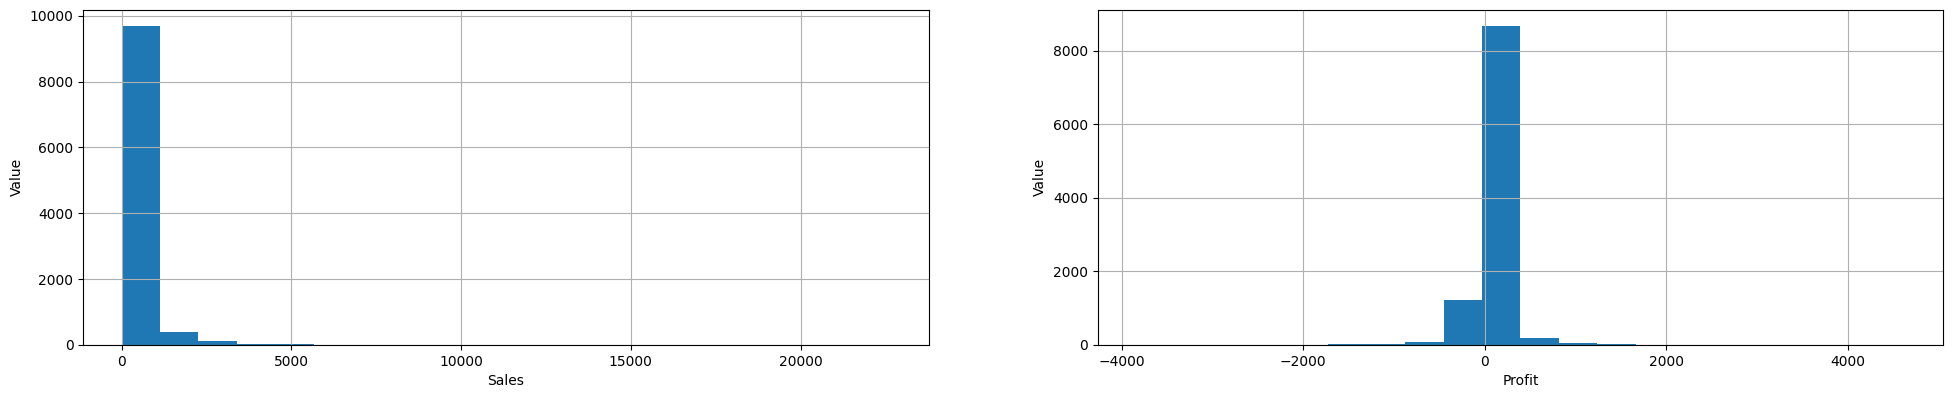

In [30]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = main_df['Sales'].hist(bins=20)
fig.set_xlabel('Sales')
fig.set_ylabel('Value')


plt.subplot(4, 2, 2)
fig = main_df['Profit'].hist(bins=20)
fig.set_xlabel('Profit')
fig.set_ylabel('Value')

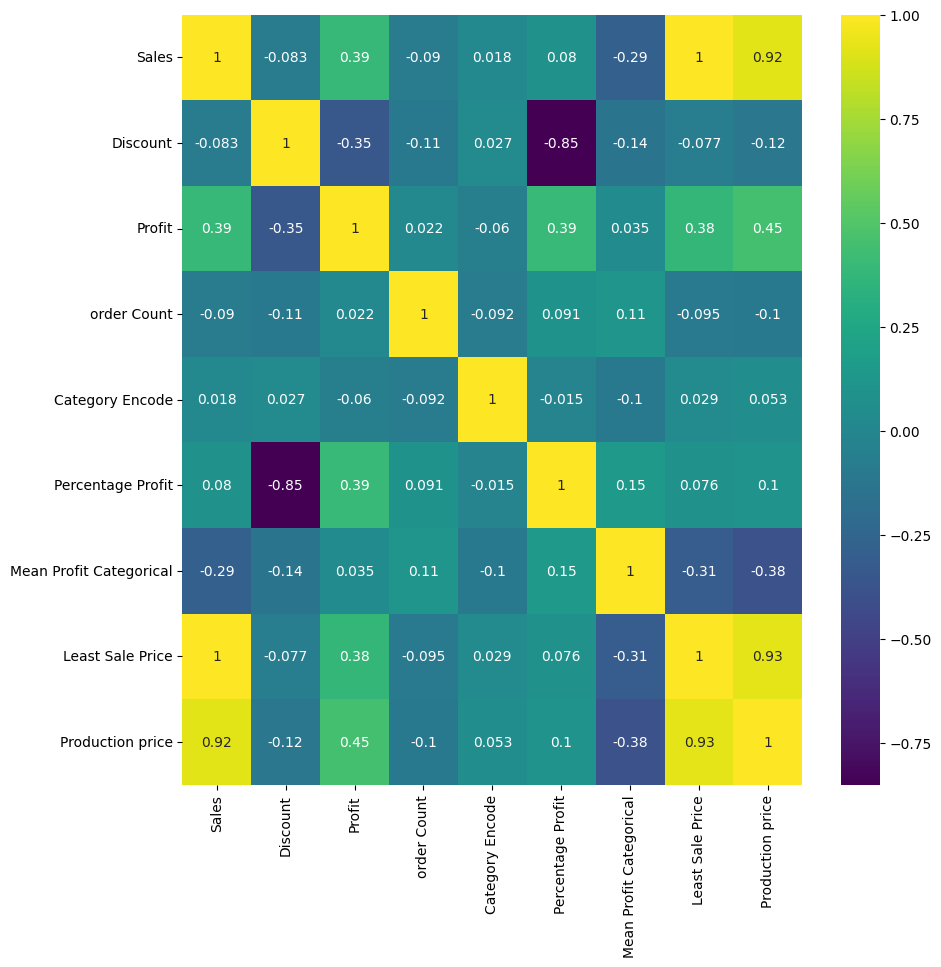

In [31]:
corr=main_df.drop(['Product ID'],axis=1).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='viridis', ax=ax) 
plt.show()

In [32]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit','Least Sale Price'])
y

0          4.560
5         90.720
14        54.080
21         4.960
28        11.440
          ...   
49665     58.020
49666      9.210
49667      1.860
49668   -124.590
49669     -3.252
Name: Profit, Length: 10246, dtype: float64

In [33]:
X

,Sales,Discount,order Count,Category Encode,Mean Profit Categorical,Production price
0,13.080,0.0,5,10,0.070166,8.491169
5,252.160,0.0,9,9,0.040968,159.186523
14,193.280,0.0,7,4,0.002180,190.330349
21,35.440,0.0,7,3,-0.031990,43.376090
28,71.600,0.0,4,2,0.071854,51.020969
...,...,...,...,...,...,...
49665,170.700,0.0,1,4,0.002180,170.327849
49666,18.840,0.0,1,7,0.020189,18.459635
49667,16.950,0.0,1,12,0.153352,14.350690
49668,177.960,0.6,1,16,-0.262423,117.884825


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

model = LinearRegression()


model.fit(X_train, y_train)


#val_predictions = model.predict(val_data)


test_predictions = model.predict(X_test)


#val_accuracy = model.score(val_data, val_labels)
test_accuracy = model.score(X_test, y_test)


print("accuracy :")
#print(val_accuracy)
print(test_accuracy)

accuracy :
0.18246507887939478


In [36]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit','Least Sale Price','Production price'])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [38]:
from sklearn.decomposition import PCA

# ایجاد یک شیء PCA با تعداد ابعاد جدید
pca = PCA(n_components=1)

# اعمال PCA بر داده‌های ورودی
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# فرض کنید داده‌های آموزشی و برچسب‌ها را دارید

# تقسیم داده‌ها به سه قسمت: آموزشی، اعتبارسنجی و آزمون

# ساخت مدل گرادیان جنگل تصادفی با پارامترهای دلخواه
model = RandomForestRegressor(n_estimators=100, random_state=42)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های اعتبارسنجی و آزمون
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# محاسبه معیار میانگین خطا (MSE) برای داده‌های اعتبارسنجی و آزمون
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

val_accuracy = model.score(X_val, y_val)
test_accuracy = model.score(X_test, y_test)

print("Validation Mean Squared Error:", val_mse)
print("Test Mean Squared Error:", test_mse)

print(val_accuracy)
print(test_accuracy)

Validation Mean Squared Error: 12193.814612123819
Test Mean Squared Error: 12443.338607748477
0.6717321359346592
0.6795002217873998


In [40]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit','Production price'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)

print(model.score(X_test, y_test))

0.30645933846262063


In [43]:
from sklearn.linear_model import Ridge

alpha = 0.5  # پارامتر جریمه
model = Ridge(alpha=alpha)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)
print(model.score(X_test, y_test))

0.48958842709003325


In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# ایجاد یک شیء مدل SVR
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)

print(model.score(X_test, y_test))

# محاسبه دقت مدل با استفاده از MSE

mse = mean_squared_error(y_test, predictions)

# محاسبه دقت مدل با استفاده از R2 score
r2 = r2_score(y_test, predictions)

print('MSE:', mse)
print('R2 Score:', r2)


0.11901786224509259
MSE: 34203.952054502384
R2 Score: 0.11901786224509259


In [41]:

xgb_estimator = xgb.XGBClassifier(objective='binary:logistic',max_depth=3, n_estimators=80)

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

# evaluate on test data
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

print('F1 score on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))
print('F1 score on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

ValueError: Unknown label type: 'continuous'

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
scaled.fit(X)
help = scaled.transform(X)
X2 = pd.DataFrame(help, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=42)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import tensorflow.keras.metrics as Acu

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# model.compile(
#         loss="categorical_crossentropy", 
#         optimizer="adam",
#         metrics=["accuracy"]
#     )
# hr=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)




Epoch 1/100
289/289 [==============================] - 1s 2ms/step - loss: -404.0320 - accuracy: 3.2534e-04
Epoch 2/100
289/289 [==============================] - 1s 2ms/step - loss: -943.7269 - accuracy: 0.0000e+00
Epoch 3/100
289/289 [==============================] - 0s 1ms/step - loss: -1039.3652 - accuracy: 0.0000e+00
Epoch 4/100
289/289 [==============================] - 0s 1ms/step - loss: -1046.4412 - accuracy: 2.1690e-04
Epoch 5/100
289/289 [==============================] - 0s 1ms/step - loss: -1053.3113 - accuracy: 2.1690e-04
Epoch 6/100
289/289 [==============================] - 0s 1ms/step - loss: -1058.8772 - accuracy: 1.0845e-04
Epoch 7/100
289/289 [==============================] - 0s 2ms/step - loss: -1067.8693 - accuracy: 1.0845e-04
Epoch 8/100
289/289 [==============================] - 0s 1ms/step - loss: -1068.4894 - accuracy: 0.0014
Epoch 9/100
289/289 [==============================] - 0s 2ms/step - loss: -1073.9529 - accuracy: 0.0104
Epoch 10/100
289/289 [=======

ValueError: y_true and y_pred have different number of output (1!=16)

In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared: {:.2f}".format(r2))

R-squared: 0.46
